In [26]:
import csv
import pandas as pd
import sqlite3
import os

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
SQL_QUERY = """
    SELECT 
    order_items.id,
    products.name,
    order_items.quantity,
    products.price,
    orders.id,
    orders.datetime
    FROM restaurant_orderitem as order_items
    JOIN restaurant_product as products 
    ON order_items.product_id = products.id
    JOIN restaurant_order as orders
    ON order_items.order_id = orders.id
    """

def get_data_from_db():
    conn = sqlite3.connect(os.path.join("..", 'db.sqlite3'))
    cur = conn.cursor()
    cur.execute(SQL_QUERY)
    data = cur.fetchall()
    cur.close()
    conn.close()
    return data

data_from_db = get_data_from_db()
with open("restaurant_data.csv", "w", newline="") as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(["ID", "Name", "Quantity", "Price", "Order ID", "Datetime"])
    csv_writer.writerows(data_from_db)
    
df = pd.read_csv("restaurant_data.csv", index_col=[0])
df

,Name,Quantity,Price,Order ID,Datetime
ID,,,,,
1,Plain Papadum,2,0.80,1,2019-08-03 20:25:00
2,King Prawn Balti,1,12.95,1,2019-08-03 20:25:00
3,Garlic Naan,1,2.95,1,2019-08-03 20:25:00
4,Mushroom Rice,1,3.95,1,2019-08-03 20:25:00
5,Paneer Tikka Masala,1,8.95,1,2019-08-03 20:25:00
...,...,...,...,...,...
74814,House Red wine 75cl,2,17.95,3255,2016-05-18 18:53:00
74815,House Red wine 75cl,2,17.95,12905,2016-05-14 19:28:00
74816,House Red wine 75cl,2,17.95,3272,2016-05-10 13:18:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 positions in menu by quantity'}, ylabel='Quantity'>

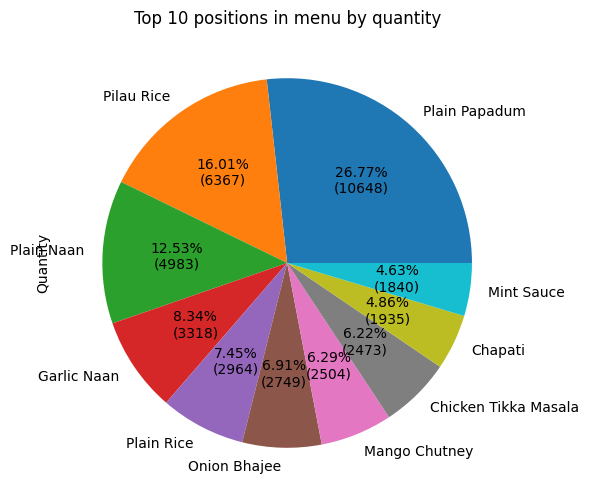

In [15]:
top10 = df.groupby(by="Name")["Quantity"].sum().sort_values(ascending=False).head(10)
total_counts = top10.sum()
def custom_percent_value(value):
    return "{:.2f}%\n({:.0f})".format(value, total_counts * value / 100)

top10.plot.pie(figsize=(6, 6), autopct=custom_percent_value, title="Top 10 positions in menu by quantity")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Top 10 sales products'}, ylabel='Total'>

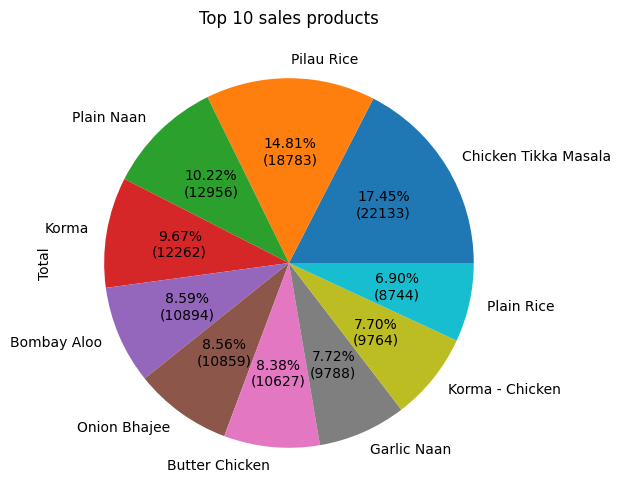

In [19]:
df["Total"] = df["Quantity"] * df["Price"]
top10 = df.groupby(by="Name")["Total"].sum().sort_values(ascending=False).head(10)
total_sum = top10.sum()

def custom_percent_value(value):
    return "{:.2f}%\n({:.0f})".format(value, total_sum * value / 100)

top10.plot.pie(figsize=(6, 6), autopct=custom_percent_value, title="Top 10 sales products")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: xlabel='Hour'>

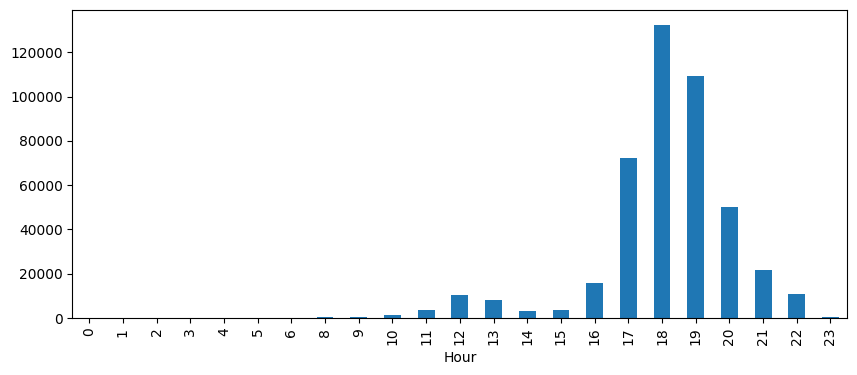

In [27]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df["Hour"] = df["Datetime"].dt.hour
sales_per_hour = df.groupby("Hour")["total money"].sum()
sales_per_hour.plot.bar(figsize=(10, 4))

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: xlabel='Order Day Of The Week'>

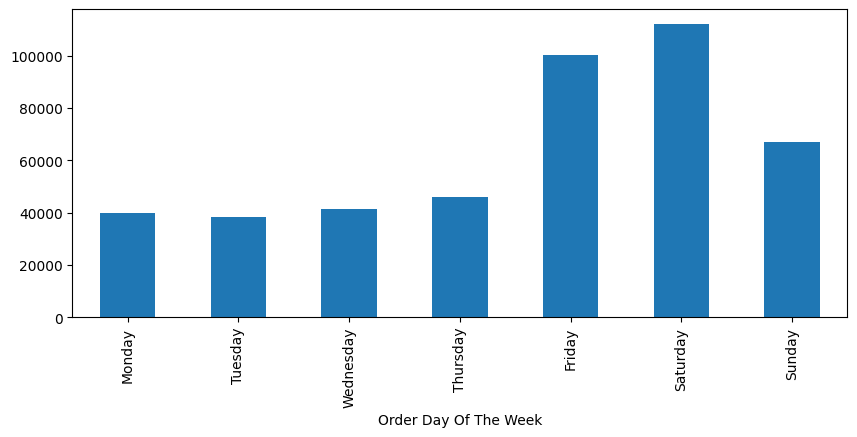

In [25]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Order Day Of The Week"] = df["Datetime"].dt.strftime("%A")
sales_per_weekdays = df.groupby("Order Day Of The Week")["total money"].sum().reindex(weekdays)
sales_per_weekdays.plot.bar(figsize=(10, 4))